# 한글 처리
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 런타임 - 런타임 다시 시작 

In [6]:
from matplotlib import font_manager, rc #한글이 나오게
import matplotlib.pyplot as plt #plotting
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)


In [7]:
critics = {
    '이수민': {
        '개운죽': 2.5,
        '금전수': 3.5,
        '떡갈잎고무나무': 3.0,
        '몬스테라': 3.5,
        '무늬접란': 2.5
    },
    '백승진': {
        '개운죽': 1.0,
        '금전수': 4.0,
        '떡갈잎고무나무': 0.5,
        '몬스테라': 1.5,
        '무늬접란': 4.0 ,
        
    },
    
    '장지선': {
        '개운죽': 3.0,
        '금전수': 3.5,
        '떡갈잎고무나무': 1.5,
        '몬스테라': 4.0,
        '무늬접란': 3.0,
        
    },
    '조현빈': {
        '개운죽': 2.5,
        '금전수': 3.0,
        #'떡갈잎고무나무': 3.0,
        '몬스테라': 3.5,
        '무늬접란': 4.0,
        
    },
    '홍성목': {
        #'개운죽': 2.0,
        '금전수': 3.5,
        '떡갈잎고무나무': 3.0,
        '몬스테라': 4.0,
        '무늬접란': 4.5,
        
    },
    '김지현': {
        '개운죽': 3.0,
        '금전수': 4.0,
        '떡갈잎고무나무': 2.0,
        '몬스테라': 3.5,
        '무늬접란': 2.0,
        
    },
    '이태희': {
        '개운죽': 3.0,
        '금전수': 4.0,
        #'떡갈잎고무나무': 2.5,
        '몬스테라': 5.0,
        '무늬접란': 3.0,
        
    },
    '박현정': {
        #'개운죽': 1.0,
        '금전수': 4.5,
        #'떡갈잎고무나무': 3.0,
         '몬스테라': 4.0,
        # '무늬접란': 0,
        
    },
} 

In [8]:
# critics data 이용해 scatter plot 그리기
def drawGraph(data, name1, name2):
    plt.figure(figsize=(14,8)) # plot 크기설정
    
    # plot 좌표를 위한 list 선언
    li = []
    li2 = []
    
    for i in critics[name1]: # i = 키 값
        if i in data[name2]: # 같은 영화를 평가했을때만
            li.append(critics[name1][i]) # name1의 평점 li[]에 추가
            li2.append(critics[name2][i]) # name2의 평점 li2[]에 추가
            plt.text(critics[name1][i],critics[name2][i],i) # 영화 제목 text 찍기
            
    plt.plot(li,li2,'ro') #plot그리기
    
    #각 축의 크기 설정 (0에서 6까지)
    plt.axis([0,6,0,6])
 
    # x축과 y축 이름 설정
    plt.xlabel(name1)
    plt.ylabel(name2)
 
    # 그리기
    plt.show()

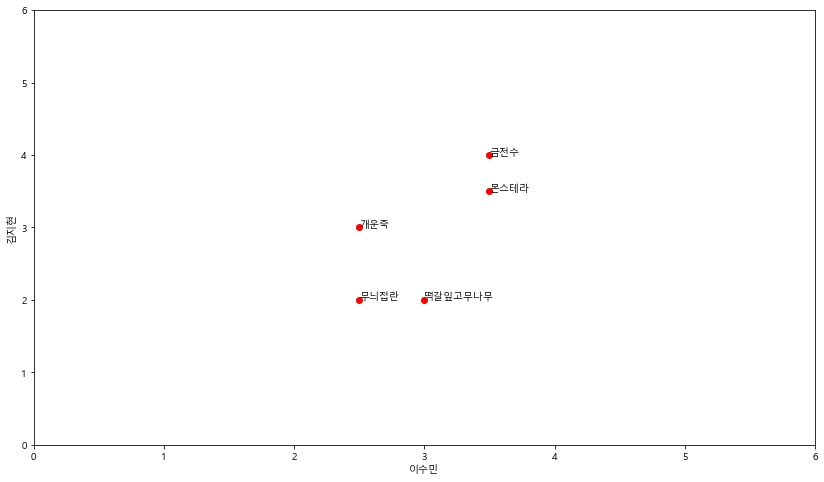

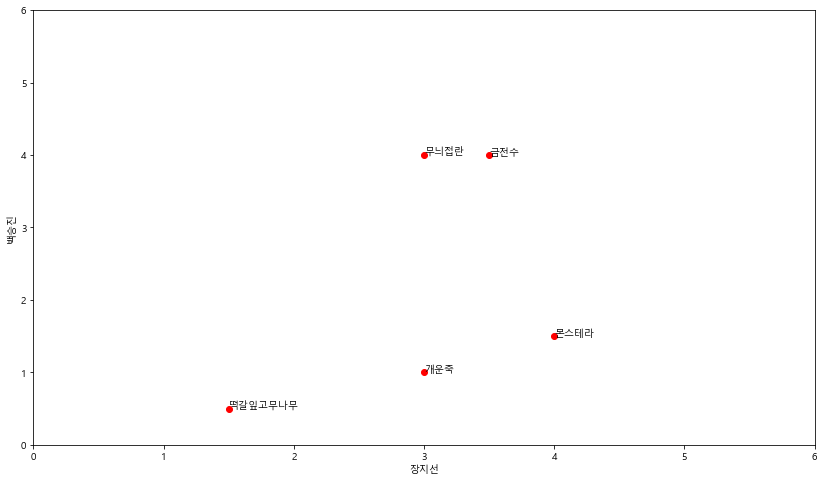

In [9]:
drawGraph(critics,'이수민','김지현')
drawGraph(critics,'장지선','백승진')

In [10]:
# 피어슨 상관계수 구하기
import math
def sim_pearson(data, name1, name2):
    sumX=0 # X의 합
    sumY=0 # Y의 합
    sumPowX=0 # X 제곱의 합
    sumPowY=0 # Y 제곱의 합
    sumXY=0 # X*Y의 합
    count=0 #식물 개수
    
    for i in data[name1]: # i = key
        if i in data[name2]: # 같은 식물을 평가했을때만
            sumX+=data[name1][i]
            sumY+=data[name2][i]
            sumPowX+=pow(data[name1][i],2)
            sumPowY+=pow(data[name2][i],2)
            sumXY+=data[name1][i]*data[name2][i]
            count+=1
    
    return ( sumXY- ((sumX*sumY)/count) )/ math.sqrt( (sumPowX - (pow(sumX,2) / count)) * (sumPowY - (pow(sumY,2)/count)))

In [11]:
sim_pearson(critics,'이수민','김지현')

0.698771242968684

In [12]:
sim_pearson(critics, '장지선','백승진')

0.4372798344344661

In [13]:
# 딕셔너리 돌면서 상관계수순으로 정렬
def top_match(data, name, index=3, sim_function=sim_pearson):
    li=[]
    for i in data: #딕셔너리를 돌고
        if name!=i: #자기 자신이 아닐때만
            li.append((sim_function(data,name,i),i)) #sim_function()을 통해 상관계수를 구하고 li[]에 추가
    li.sort() #오름차순
    li.reverse() #내림차순
    return li[:index]

In [14]:
top_match(critics, '박현정',3)

ZeroDivisionError: float division by zero

In [15]:
def getRecommendation (data,person,sim_function=sim_pearson):
    result = top_match(critics, person ,len(data))
    
    simSum=0 # 유사도 합을 위한 변수
    score=0 # 평점 합을 위한 변수
    li=[] # 리턴을 위한 리스트
    score_dic={} # 유사도 총합을 위한 dic
    sim_dic={} # 평점 총합을 위한 dic
 
    for sim,name in result: # 튜플이므로 한번에 
        if sim<0 : continue #유사도가 양수인 사람만
        for movie in data[name]: 
            if movie not in data[person]: #name이 평가를 내리지 않은 식물
                score+=sim*data[name][movie] # 그사람의 식물평점 * 유사도
                score_dic.setdefault(movie,0) # 기본값 설정
                score_dic[movie]+=score # 합계 구함
 
                # 조건에 맞는 사람의 유사도의 누적합을 구한다
                sim_dic.setdefault(movie,0) 
                sim_dic[movie]+=sim
 
            score=0  #식물이 바뀌었으니 초기화한다
    
    for key in score_dic: 
        score_dic[key]=score_dic[key]/sim_dic[key] # 평점 총합/ 유사도 총합
        li.append((score_dic[key],key)) # list((tuple))의 리턴을 위해서.
    li.sort() #오름차순
    li.reverse() #내림차순
    return li

In [16]:
getRecommendation(critics, '박현정')

ZeroDivisionError: float division by zero

In [17]:
# 피어슨 상관계수 구하기
import math
def sim_pearson(data, name1, name2):
    print(name1, name2)
    sumX=0 # X의 합
    sumY=0 # Y의 합
    sumPowX=0 # X 제곱의 합
    sumPowY=0 # Y 제곱의 합
    sumXY=0 # X*Y의 합
    count=0 #식물 개수

    for i in data[name1]: # i = key
        if i in data[name2]: # 같은 식물을 평가했을때만
            sumX+=data[name1][i]
            sumY+=data[name2][i]
            sumPowX+=pow(data[name1][i],2)
            sumPowY+=pow(data[name2][i],2)
            sumXY+=data[name1][i]*data[name2][i]
            count+=1
        print(count, sumXY, sumX*sumY/count, sumXY-(sumX*sumY/count))

    #return ( sumXY- ((sumX*sumY)/count) )/ math.sqrt( (sumPowX - (pow(sumX,2) / count)) * (sumPowY - (pow(sumY,2)/count)))

# 딕셔너리 돌면서 상관계수순으로 정렬
def top_match(data, name, index=3, sim_function=sim_pearson):
    li=[]
    for i in data: #딕셔너리를 돌고
        if name!=i: #자기 자신이 아닐때만
            li.append((sim_function(data,name,i),i)) #sim_function()을 통해 상관계수를 구하고 li[]에 추가
    li.sort() #오름차순
    li.reverse() #내림차순
    return li[:index]

top_match(critics, '박현정',3)

박현정 이수민
1 15.75 15.75 0.0
2 29.75 29.75 0.0
박현정 백승진
1 18.0 18.0 0.0
2 24.0 23.375 0.625
박현정 장지선
1 15.75 15.75 0.0
2 31.75 31.875 -0.125
박현정 조현빈
1 13.5 13.5 0.0
2 27.5 27.625 -0.125
박현정 홍성목
1 15.75 15.75 0.0
2 31.75 31.875 -0.125
박현정 김지현
1 18.0 18.0 0.0
2 32.0 31.875 0.125
박현정 이태희
1 18.0 18.0 0.0
2 38.0 38.25 -0.25


[(None, '홍성목'), (None, '조현빈'), (None, '장지선')]